# Test to reproduce Emma's code for analysing DA per organ

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
#import scvelo  ## For mouse gastrulation data 
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

import milopy as milopy
import milopy.core as milo
import milopy.plot as milopl

import seaborn as sns
sc.logging.print_header()

/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [2]:
## r2py setup
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(tidyverse)
library(reshape2)
library(patchwork)

remove_x_axis <- function(){
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank())  
}

remove_y_axis <- function(){
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.title.y = element_blank())  
}

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to create bus connection: Host is down


In [5]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/healthy_analysis/pooled_healthy_final.samples_with_age_info.formilo.metadata_fixed.h5ad')

In [6]:
adata.obs.study.value_counts()

Elmentaite2021           368866
Madissoon2019            104758
Kim2022                  104319
Williams2021              68114
Holloway2021              60436
Yu2021                    50227
James2020                 37094
CBTM_unpublished          34239
He2020GenomeBio           28669
Huang2019                 22626
Jaeger2021                22165
Uzzan2022                 19852
Wang2020                  18447
Lee2020                   18324
CostaDaSilva2022          15367
Newcastle_unpublished      9512
Chen2021                   8727
Kinchen2018                8634
Dominguez2022              7697
Jeong2021                  2475
Pagella2021                1975
Li2019                     1526
Name: study, dtype: int64

In [7]:
adata.obs.organ_unified.value_counts()

ileum               183117
duodenum            144244
stomach             143803
colon               128107
oesophagus          116866
gingival mucosa      39390
MLN                  35312
small intestine      29473
transverse           29266
buccal mucosa        28724
sigmoid colon        28503
salivary gland       24094
ascending colon      21724
rectum               18950
caecum               18371
jejunum              12199
descending colon      5581
appendix              2199
intestine             2151
periodontium          1975
Name: organ_unified, dtype: int64

In [8]:
adata.obs['dev_vs_adult'] = (adata.obs['donor_category']
        .map(lambda x:{'control':'b_adult',
                      'inutero':'a_developing',
                      'preterm':'a_developing'}.get(x,x)).astype('category'))

In [9]:
adata.obs['dev_vs_adult']

index
AAACCTGAGCTGTTCA-HCA_A_GT12934997    b_adult
AAACCTGAGGGCTTGA-HCA_A_GT12934997    b_adult
AAACCTGAGTACGCGA-HCA_A_GT12934997    b_adult
AAACCTGCATATGAGA-HCA_A_GT12934997    b_adult
AAACCTGTCAGGTAAA-HCA_A_GT12934997    b_adult
                                      ...   
TTTGTCAAGAACAACT-GSM5525958          b_adult
TTTGTCAAGATAGGAG-GSM5525958          b_adult
TTTGTCAAGTAGGCCA-GSM5525958          b_adult
TTTGTCAGTTGGACCC-GSM5525958          b_adult
TTTGTCATCACATACG-GSM5525958          b_adult
Name: dev_vs_adult, Length: 1014049, dtype: category
Categories (2, object): ['a_developing', 'b_adult']

In [10]:
pd.crosstab(adata.obs.dev_vs_adult,adata.obs.organ_unified)

organ_unified,MLN,appendix,ascending colon,buccal mucosa,caecum,colon,descending colon,duodenum,gingival mucosa,ileum,intestine,jejunum,oesophagus,periodontium,rectum,salivary gland,sigmoid colon,small intestine,stomach,transverse
dev_vs_adult,,,,,,,,,,,,,,,,,,,,
a_developing,5936,0,0,0,0,62181,0,125023,0,105657,2151,3884,4598,0,0,0,0,17542,16164,0
b_adult,29376,2199,21724,28724,18371,65926,5581,19221,39390,77460,0,8315,112268,1975,18950,24094,28503,11931,127639,29266


In [11]:
adata

AnnData object with n_obs × n_vars = 1014049 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [12]:
adata.obs['fine_annot'] = (adata.obs['fine_annot']
        .map(lambda x:{'TA':'TA_cycling',
                       'BEST4':'BEST4_enterocyte_colonocyte',
                      'DSC_MUC17':'DCS_MUC17',
                      'DSC_MUC17':'DCS_MUC17_cycling',
                      'MUC6':'Mucous_gland_neck',
                      'MUC5AC':'Surface_foveolar',
                      'Late_colonocyte':'Mature_colonocyte'}.get(x,x)).astype('category'))

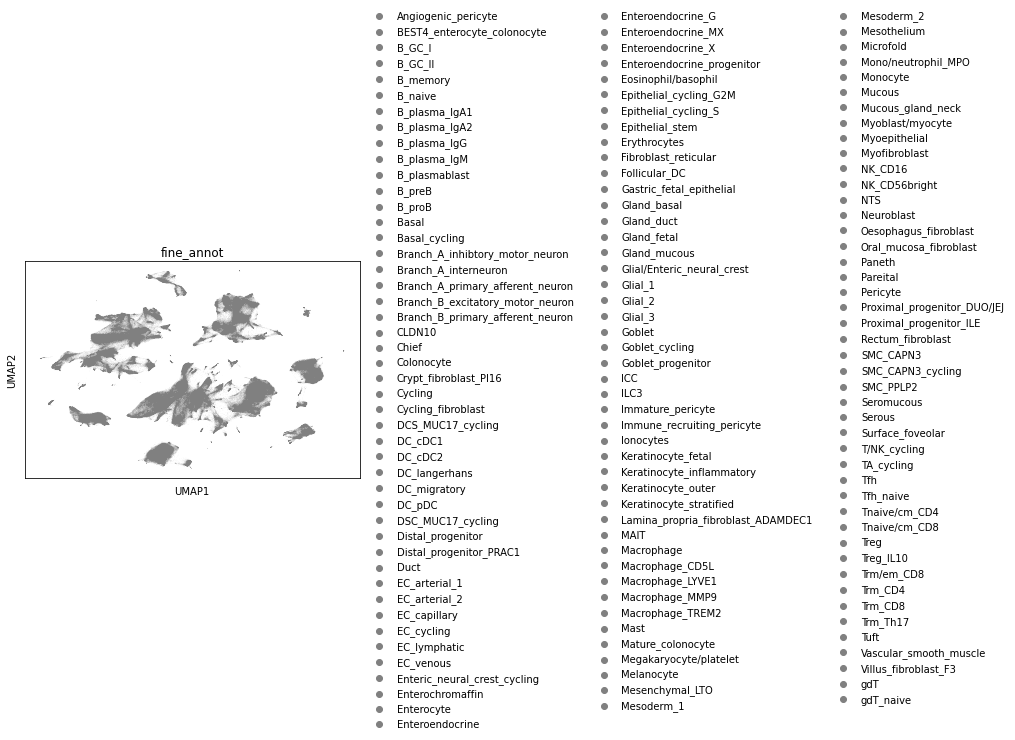

In [13]:
sc.pl.umap(adata,color='fine_annot')

## Define neighbourhoods

In [14]:
adata

AnnData object with n_obs × n_vars = 1014049 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [15]:
adata.obsm['X_scvi'] = adata.obsm['X_scvi'].values.copy()

In [16]:
adata.obsm['X_scvi']

array([[ 3.92173830e-02,  1.74899560e-01, -2.13354170e-03, ...,
        -4.03154300e-03,  5.03892660e-01,  7.80492500e-01],
       [-5.08338200e-04,  3.17970900e-01, -1.28865150e-02, ...,
         4.14977780e-04, -1.01063564e-01,  6.46618400e-01],
       [ 1.15553310e+00,  8.15030260e-02, -4.78073440e-03, ...,
         2.71632430e-03, -6.88317240e-01,  3.98088040e-01],
       ...,
       [-2.90889980e-01, -7.32783140e-01, -5.23924800e-03, ...,
        -5.01340160e-03, -7.20051800e-02, -7.41344750e-01],
       [ 4.62098200e-02, -1.30939720e-01, -4.00358300e-03, ...,
        -5.92866700e-03,  5.27333260e-01,  6.63492000e-01],
       [-1.08748450e-02, -5.63042640e-01, -7.05632800e-03, ...,
        -6.42652250e-03, -5.66891600e-01, -1.23060850e+00]])

In [17]:
adata

AnnData object with n_obs × n_vars = 1014049 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [18]:
## Recompute KNN graph
sc.pp.neighbors(adata, use_rep = "X_scvi", n_neighbors = 30, key_added="scvi")

computing neighbors
    finished: added to `.uns['scvi']`
    `.obsp['scvi_distances']`, distances for each pair of neighbors
    `.obsp['scvi_connectivities']`, weighted adjacency matrix (0:05:11)


In [19]:
milo.make_nhoods(adata, neighbors_key="scvi", prop=0.05)

In [20]:
milo.count_nhoods(adata, sample_col="donorID_unified")

/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [21]:
adata

AnnData object with n_obs × n_vars = 1014049 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

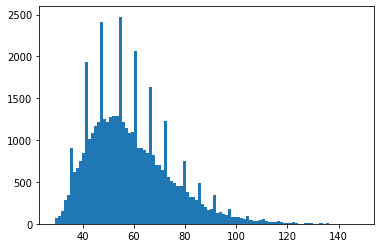

In [22]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);

milo.DA_nhoods(adataNC_fibro, design="~study+condition_harmonized_DA",model_contrasts=None, 
               subset_samples=test_samples)

In [23]:
def _milo_test_by_organ(adata, design="~ dev_vs_adult", sample_col="donorID_unified", test_organs = None):  
    if test_organs is None:
        ## Keep organs covering at least two time-points
        df = adata.obs[["organ_unified",sample_col, "dev_vs_adult"]].drop_duplicates()
        df = df.groupby(["organ_unified","dev_vs_adult"]).count().reset_index().pivot("organ_unified",columns="dev_vs_adult")
        sampled_organs = df.index[(df > 0).sum(1) > 2]
    else:
        sampled_organs = test_organs

    ## Calculate logFC and SpatialFDR within each organ
    milo_res_dict = {}
    for org in sampled_organs:
        print(org)
        org_samples = adata.obs[adata.obs["organ_unified"] == org][sample_col].unique()
        milo.DA_nhoods(adata, design=design, subset_samples=org_samples)
        milo_res_dict[org] = adata.uns["nhood_adata"].obs.copy()

    ## Collapse results
    logFC_df_ls = [v["logFC"] for k,v in milo_res_dict.items()]
    for k,v in milo_res_dict.items():
        milo_res_dict[k]["logFC_" + k] = milo_res_dict[k]["logFC"].copy()
        milo_res_dict[k]["SpatialFDR_" + k] = milo_res_dict[k]["SpatialFDR"].copy()

    org_fc = pd.concat([v[["logFC_" + k]] for k,v in milo_res_dict.items()], 1)
    org_fdr = pd.concat([v[["SpatialFDR_" + k]] for k,v in milo_res_dict.items()], 1)
    return(milo_res_dict, org_fc, org_fdr)

#### For some reason this doesn't work properly, the last sampled_organs line comes up with nothing

In [24]:
df = adata.obs[["organ_unified",'donorID_unified', "dev_vs_adult"]].drop_duplicates()
df = df.groupby(["organ_unified","dev_vs_adult"]).count().reset_index().pivot("organ_unified",columns="dev_vs_adult")
sampled_organs = df.index[(df > 0).sum(1) > 2]

In [25]:
sampled_organs

CategoricalIndex([], categories=['MLN', 'appendix', 'ascending colon', 'buccal mucosa', 'caecum', 'colon', 'descending colon', 'duodenum', ...], ordered=False, dtype='category', name='organ_unified')

In [26]:
df

donorID_unified        
dev_vs_adult        a_developing b_adult
organ_unified                           
MLN                            2       9
appendix                       0       5
ascending colon                0       8
buccal mucosa                  0       8
caecum                         0      14
colon                         18      13
descending colon               0       3
duodenum                      22       6
gingival mucosa                0      13
ileum                         18      22
intestine                      2       0
jejunum                        1       3
oesophagus                     2       8
periodontium                   0       4
rectum                         0       6
salivary gland                 0       5
sigmoid colon                  0      13
small intestine                5       2
stomach                        3      36
transverse                     0       9

In [27]:
sampled_organs = df.index[(df > 0).sum(1) > 2]

In [28]:
sampled_organs

CategoricalIndex([], categories=['MLN', 'appendix', 'ascending colon', 'buccal mucosa', 'caecum', 'colon', 'descending colon', 'duodenum', ...], ordered=False, dtype='category', name='organ_unified')

In [29]:
milo_res, org_fc, org_fdr = _milo_test_by_organ(adata, design="~ dev_vs_adult",test_organs=['stomach','duodenum','ileum','colon'])

stomach


/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/rpy2/robjects/vectors.py:1008: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '
/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2236: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))
/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)


duodenum


/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)


ileum


/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)


colon


/home/jovyan/my-conda-envs/milo_clone/lib/python3.10/site-packages/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)
/tmp/ipykernel_1399/2770080825.py:24: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  org_fc = pd.concat([v[["logFC_" + k]] for k,v in milo_res_dict.items()], 1)
/tmp/ipykernel_1399/2770080825.py:25: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  org_fdr = pd.concat([v[["SpatialFDR_" + k]] for k,v in milo_res_dict.items()], 1)


In [30]:
org_fc

,logFC_stomach,logFC_duodenum,logFC_ileum,logFC_colon
0,3.115104,5.702929,3.963090,NaN
1,2.283241,4.580979,3.498254,1.863726
2,2.849825,5.496899,3.805606,3.510997
3,3.528502,6.311193,4.549152,NaN
4,2.914481,5.496899,3.767581,NaN
...,...,...,...,...
45944,1.715664,1.863974,1.781776,5.603507
45945,0.450101,2.076588,1.994627,3.998221
45946,2.000665,NaN,2.385859,5.266653
45947,3.188052,NaN,1.695225,3.587342


In [31]:
org_fdr

,SpatialFDR_stomach,SpatialFDR_duodenum,SpatialFDR_ileum,SpatialFDR_colon
0,0.153081,0.000003,0.000026,NaN
1,0.153081,0.000110,0.000095,0.006994
2,0.153585,0.000007,0.000042,0.000179
3,0.153081,0.000002,0.000011,NaN
4,0.153081,0.000007,0.000048,NaN
...,...,...,...,...
45944,0.206363,0.031892,0.009460,0.000124
45945,0.564163,0.010254,0.005463,0.000179
45946,0.153081,NaN,0.001083,0.000124
45947,0.153081,NaN,0.009460,0.000179


### Anyway, lets continue trying to recreate the plots

In [32]:
adata

AnnData object with n_obs × n_vars = 1014049 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [33]:
adata.uns['nhood_adata']

AnnData object with n_obs × n_vars = 45949 × 155
    obs: 'index_cell', 'kth_distance', 'SpatialFDR', 'logFC', 'logCPM', 'F', 'PValue', 'FDR'
    var: 'dev_vs_adult', 'donorID_unified'
    uns: 'sample_col'

In [34]:
list(adata.obs.fine_annot.unique())

['Tnaive/cm_CD8',
 'NK_CD56bright',
 'NK_CD16',
 'Monocyte',
 'B_naive',
 'Tnaive/cm_CD4',
 'Trm_CD4',
 'B_memory',
 'Trm/em_CD8',
 'Trm_CD8',
 'gdT',
 'B_preB',
 'Trm_Th17',
 'Macrophage',
 'Treg',
 'Macrophage_TREM2',
 'MAIT',
 'T/NK_cycling',
 'Treg_IL10',
 'Tfh_naive',
 'B_proB',
 'B_plasmablast',
 'B_plasma_IgG',
 'Macrophage_LYVE1',
 'ILC3',
 'Oral_mucosa_fibroblast',
 'DC_cDC2',
 'Megakaryocyte/platelet',
 'TA_cycling',
 'Mono/neutrophil_MPO',
 'B_plasma_IgA1',
 'Macrophage_MMP9',
 'EC_lymphatic',
 'EC_arterial_2',
 'Macrophage_CD5L',
 'EC_arterial_1',
 'DC_cDC1',
 'Tfh',
 'Oesophagus_fibroblast',
 'Lamina_propria_fibroblast_ADAMDEC1',
 'B_plasma_IgA2',
 'EC_capillary',
 'Vascular_smooth_muscle',
 'EC_venous',
 'gdT_naive',
 'B_GC_I',
 'Mast',
 'B_plasma_IgM',
 'DC_langerhans',
 'Fibroblast_reticular',
 'Crypt_fibroblast_PI16',
 'Rectum_fibroblast',
 'DC_migratory',
 'B_GC_II',
 'Pericyte',
 'Follicular_DC',
 'DC_pDC',
 'Microfold',
 'Enterocyte',
 'Epithelial_stem',
 'Immune_re

In [35]:
## Add annotation
milopy.utils.annotate_nhoods(adata, anno_col="fine_annot")
org_fc["nhood_anno"] = adata.uns["nhood_adata"].obs["nhood_annotation"]
org_fc.loc[adata.uns["nhood_adata"].obs["nhood_annotation_frac"] < 0.5, "nhood_anno"] = "Mixed"

In [36]:
org_fc

,logFC_stomach,logFC_duodenum,logFC_ileum,logFC_colon,nhood_anno
0,3.115104,5.702929,3.963090,NaN,Trm/em_CD8
1,2.283241,4.580979,3.498254,1.863726,Trm/em_CD8
2,2.849825,5.496899,3.805606,3.510997,B_memory
3,3.528502,6.311193,4.549152,NaN,Monocyte
4,2.914481,5.496899,3.767581,NaN,Trm/em_CD8
...,...,...,...,...,...
45944,1.715664,1.863974,1.781776,5.603507,Trm_CD4
45945,0.450101,2.076588,1.994627,3.998221,Trm_CD4
45946,2.000665,NaN,2.385859,5.266653,Trm_CD4
45947,3.188052,NaN,1.695225,3.587342,B_plasma_IgA1


In [37]:
org_fc.dtypes

logFC_stomach     float64
logFC_duodenum    float64
logFC_ileum       float64
logFC_colon       float64
nhood_anno         object
dtype: object

In [38]:
org_fc.dtypes

logFC_stomach     float64
logFC_duodenum    float64
logFC_ileum       float64
logFC_colon       float64
nhood_anno         object
dtype: object

In [39]:
%%R -i org_fc -i org_fdr -h 1000 -w 800 -o plot_df

long_org_fc <- org_fc %>%
    rowid_to_column("Nhood") %>%
    #pivot_longer(cols= - c(nhood_anno, anno_group, Nhood), names_to="organ", values_to="logFC") %>%
    pivot_longer(cols= - c(nhood_anno, Nhood), names_to="organ", values_to="logFC") %>%
    mutate(organ=str_remove(organ, "logFC_")) 

long_org_fdr <- org_fdr %>%
    rowid_to_column("Nhood") %>%
    pivot_longer(cols= - c(Nhood), names_to="organ", values_to="SpatialFDR") %>%
    mutate(organ=str_remove(organ, "SpatialFDR_")) 
    
plot_df <- left_join(long_org_fc, long_org_fdr) %>%
    filter(!is.na(logFC)) %>%
    filter(nhood_anno!="nan") %>%
    filter(nhood_anno!="Mixed") %>%
    ## Fix organ naming and order 
    #mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    ## Fix some names
    #mutate(nhood_anno=ifelse(str_detect(nhood_anno, "NK$"), "NK", nhood_anno)) %>%
    ## Reorder by fold-change 
    group_by(organ, nhood_anno, Nhood) %>%
    mutate(mean_logFC = mean(logFC)) %>%
    ungroup() %>%
    group_by(organ, nhood_anno) %>%
    arrange(- mean_logFC) %>%
    ungroup()  %>%
    mutate(Nhood=factor(Nhood, levels=unique(Nhood))) %>%
    group_by(nhood_anno) %>%
    filter(length(unique(Nhood)) > 20) %>%
    ungroup()

head(plot_df)

Joining, by = c("Nhood", "organ")
# A tibble: 6 × 6
  Nhood nhood_anno    organ    logFC SpatialFDR mean_logFC
  <fct> <chr>         <chr>    <dbl>      <dbl>      <dbl>
1 707   Tnaive/cm_CD4 duodenum  7.26 0.00000202       7.26
2 25    NK_CD16       duodenum  7.22 0.00000192       7.22
3 171   NK_CD56bright duodenum  7.18 0.00000189       7.18
4 510   Tnaive/cm_CD8 duodenum  7.18 0.00000189       7.18
5 513   Tnaive/cm_CD4 duodenum  7.13 0.00000184       7.13
6 657   B_naive       duodenum  7.08 0.00000181       7.08


In [40]:
plot_df

,Nhood,nhood_anno,organ,logFC,SpatialFDR,mean_logFC
1,1,Tnaive/cm_CD4,duodenum,7.262853,2.022091e-06,7.262853
2,2,NK_CD16,duodenum,7.223134,1.924843e-06,7.223134
3,3,NK_CD56bright,duodenum,7.182290,1.893940e-06,7.182290
4,4,Tnaive/cm_CD8,duodenum,7.182290,1.893940e-06,7.182290
5,5,Tnaive/cm_CD4,duodenum,7.125968,1.844707e-06,7.125968
...,...,...,...,...,...,...
128922,39128,Mesoderm_1,stomach,-7.793359,3.500357e-07,-7.793359
128923,27230,Mesoderm_1,stomach,-7.913134,2.652901e-07,-7.913134
128924,27134,Mesoderm_1,stomach,-7.958392,2.194622e-07,-7.958392
128925,31235,Mesoderm_1,stomach,-7.969488,2.194622e-07,-7.969488


In [41]:
celltypes = adata.obs[['fine_annot','broad_annot_20220917']]

In [42]:
celltypes

,fine_annot,broad_annot_20220917
index,,
AAACCTGAGCTGTTCA-HCA_A_GT12934997,Tnaive/cm_CD8,T and NK cells
AAACCTGAGGGCTTGA-HCA_A_GT12934997,NK_CD56bright,T and NK cells
AAACCTGAGTACGCGA-HCA_A_GT12934997,NK_CD16,T and NK cells
AAACCTGCATATGAGA-HCA_A_GT12934997,NK_CD16,T and NK cells
AAACCTGTCAGGTAAA-HCA_A_GT12934997,Monocyte,Myeloid
...,...,...
TTTGTCAAGAACAACT-GSM5525958,Trm_CD4,T and NK cells
TTTGTCAAGATAGGAG-GSM5525958,B_plasma_IgA1,B and B plasma
TTTGTCAAGTAGGCCA-GSM5525958,B_plasma_IgA1,B and B plasma


In [43]:
celltypes.broad_annot_20220917.value_counts()

Epithelial        346614
Mesenchymal       269809
T and NK cells    151355
B and B plasma    139974
Endothelial        51859
Myeloid            31447
Neural             22991
Name: broad_annot_20220917, dtype: int64

In [44]:
epi = celltypes[celltypes.broad_annot_20220917.isin(['Epithelial'])]

In [45]:
mes = celltypes[celltypes.broad_annot_20220917.isin(['Mesenchymal'])]
t = celltypes[celltypes.broad_annot_20220917.isin(['T and NK cells'])]
b = celltypes[celltypes.broad_annot_20220917.isin(['B and B plasma'])]
endo = celltypes[celltypes.broad_annot_20220917.isin(['Endothelial'])]
mye = celltypes[celltypes.broad_annot_20220917.isin(['Myeloid'])]
neural = celltypes[celltypes.broad_annot_20220917.isin(['Neural'])]

In [46]:
list(epi.fine_annot.unique())

['TA_cycling',
 'Microfold',
 'Enterocyte',
 'Epithelial_stem',
 'Surface_foveolar',
 'Mucous_gland_neck',
 'Cycling',
 'Pareital',
 'Enteroendocrine_MX',
 'Enterochromaffin',
 'Chief',
 'Enteroendocrine_G',
 'Goblet_progenitor',
 'Goblet',
 'Enteroendocrine',
 'Enteroendocrine_X',
 'Goblet_cycling',
 'BEST4_enterocyte_colonocyte',
 'Tuft',
 'Paneth',
 'Serous',
 'Mucous',
 'Duct',
 'Seromucous',
 'Myoepithelial',
 'Basal',
 'Ionocytes',
 'Melanocyte',
 'Colonocyte',
 'Mature_colonocyte',
 'Epithelial_cycling_G2M',
 'Proximal_progenitor_DUO/JEJ',
 'Epithelial_cycling_S',
 'NTS',
 'Proximal_progenitor_ILE',
 'Enteroendocrine_progenitor',
 'Distal_progenitor',
 'CLDN10',
 'Distal_progenitor_PRAC1',
 'Gastric_fetal_epithelial',
 'DSC_MUC17_cycling',
 'DCS_MUC17_cycling',
 'Keratinocyte_stratified',
 'Gland_basal',
 'Gland_fetal',
 'Keratinocyte_outer',
 'Basal_cycling',
 'Keratinocyte_fetal',
 'Gland_duct',
 'Gland_mucous',
 'Keratinocyte_inflammatory']

In [47]:
list(mes.fine_annot.unique())

['Oral_mucosa_fibroblast',
 'Oesophagus_fibroblast',
 'Lamina_propria_fibroblast_ADAMDEC1',
 'Vascular_smooth_muscle',
 'Fibroblast_reticular',
 'Crypt_fibroblast_PI16',
 'Rectum_fibroblast',
 'Pericyte',
 'Follicular_DC',
 'Immune_recruiting_pericyte',
 'Villus_fibroblast_F3',
 'Myofibroblast',
 'Mesoderm_2',
 'SMC_PPLP2',
 'Cycling_fibroblast',
 'ICC',
 'SMC_CAPN3',
 'Mesoderm_1',
 'SMC_CAPN3_cycling',
 'Mesothelium',
 'Angiogenic_pericyte',
 'Immature_pericyte',
 'Mesenchymal_LTO',
 'Myoblast/myocyte']

In [48]:
list(t.fine_annot.unique())

['Tnaive/cm_CD8',
 'NK_CD56bright',
 'NK_CD16',
 'Tnaive/cm_CD4',
 'Trm_CD4',
 'Trm/em_CD8',
 'Trm_CD8',
 'gdT',
 'Trm_Th17',
 'Treg',
 'MAIT',
 'T/NK_cycling',
 'Treg_IL10',
 'Tfh_naive',
 'ILC3',
 'Tfh',
 'gdT_naive']

In [49]:
list(b.fine_annot.unique())

['B_naive',
 'B_memory',
 'B_preB',
 'B_proB',
 'B_plasmablast',
 'B_plasma_IgG',
 'B_plasma_IgA1',
 'B_plasma_IgA2',
 'B_GC_I',
 'B_plasma_IgM',
 'B_GC_II']

In [50]:
list(endo.fine_annot.unique())

['EC_lymphatic',
 'EC_arterial_2',
 'EC_arterial_1',
 'EC_capillary',
 'EC_venous',
 'EC_cycling']

In [51]:
list(mye.fine_annot.unique())

['Monocyte',
 'Macrophage',
 'Macrophage_TREM2',
 'Macrophage_LYVE1',
 'DC_cDC2',
 'Megakaryocyte/platelet',
 'Mono/neutrophil_MPO',
 'Macrophage_MMP9',
 'Macrophage_CD5L',
 'DC_cDC1',
 'Mast',
 'DC_langerhans',
 'DC_migratory',
 'DC_pDC',
 'Erythrocytes',
 'Eosinophil/basophil']

In [52]:
list(neural.fine_annot.unique())

['Glial_2',
 'Enteric_neural_crest_cycling',
 'Glial/Enteric_neural_crest',
 'Neuroblast',
 'Glial_3',
 'Branch_A_inhibtory_motor_neuron',
 'Branch_B_excitatory_motor_neuron',
 'Branch_B_primary_afferent_neuron',
 'Glial_1',
 'Branch_A_primary_afferent_neuron',
 'Branch_A_interneuron']

In [53]:
anno_groups_dict = {'Neural':[
 'Glial_2',
 'Enteric_neural_crest_cycling',
 'Glial/Enteric_neural_crest',
 'Neuroblast',
 'Glial_3',
 'Branch_A_inhibtory_motor_neuron',
 'Branch_B_excitatory_motor_neuron',
 'Branch_B_primary_afferent_neuron',
 'Glial_1',
 'Branch_A_primary_afferent_neuron',
 'Branch_A_interneuron'],
                   
'Myeloid':['Monocyte',
 'Macrophage',
 'Macrophage_TREM2',
 'Macrophage_LYVE1',
 'DC_cDC2',
 'Megakaryocyte/platelet',
 'Mono/neutrophil_MPO',
 'Macrophage_MMP9',
 'Macrophage_CD5L',
 'DC_cDC1',
 'Mast',
 'DC_langerhans',
 'DC_migratory',
 'DC_pDC',
 'Erythrocytes',
 'Eosinophil/basophil'],
                   
'Endo':['EC_lymphatic',
 'EC_arterial_2',
 'EC_arterial_1',
 'EC_capillary',
 'EC_venous',
 'EC_cycling'],
                    
'B and B plasma':['B_naive',
 'B_memory',
 'B_preB',
 'B_proB',
 'B_plasmablast',
 'B_plasma_IgG',
 'B_plasma_IgA1',
 'B_plasma_IgA2',
 'B_GC_I',
 'B_plasma_IgM',
 'B_GC_II'],
                    
'T and NK cells':['Tnaive/cm_CD8',
 'NK_CD56bright',
 'NK_CD16',
 'Tnaive/cm_CD4',
 'Trm_CD4',
 'Trm/em_CD8',
 'Trm_CD8',
 'gdT',
 'Trm_Th17',
 'Treg',
 'MAIT',
 'T/NK_cycling',
 'Treg_IL10',
 'Tfh_naive',
 'ILC3',
 'Tfh',
 'gdT_naive'],
                    
'Mesenchmyal':['Oral_mucosa_fibroblast',
 'Oesophagus_fibroblast',
 'Lamina_propria_fibroblast_ADAMDEC1',
 'Vascular_smooth_muscle',
 'Fibroblast_reticular',
 'Crypt_fibroblast_PI16',
 'Rectum_fibroblast',
 'Pericyte',
 'Follicular_DC',
 'Immune_recruiting_pericyte',
 'Villus_fibroblast_F3',
 'Myofibroblast',
 'Mesoderm_2',
 'SMC_PPLP2',
 'Cycling_fibroblast',
 'ICC',
 'SMC_CAPN3',
 'Mesoderm_1',
 'SMC_CAPN3_cycling',
 'Mesothelium',
 'Angiogenic_pericyte',
 'Immature_pericyte',
 'Mesenchymal_LTO',
 'Myoblast/myocyte'],

'Epithelial':['TA_cycling',
 'Microfold',
 'Enterocyte',
 'Epithelial_stem',
 'Surface_foveolar',
 'Mucous_gland_neck',
 'Cycling',
 'Pareital',
 'Enteroendocrine_MX',
 'Enterochromaffin',
 'Chief',
 'Enteroendocrine_G',
 'Goblet_progenitor',
 'Goblet',
 'Enteroendocrine',
 'Enteroendocrine_X',
 'Goblet_cycling',
 'BEST4_enterocyte_colonocyte',
 'Tuft',
 'Paneth',
 'Serous',
 'Mucous',
 'Duct',
 'Seromucous',
 'Myoepithelial',
 'Basal',
 'Ionocytes',
 'Melanocyte',
 'Colonocyte',
 'Mature_colonocyte',
 'Epithelial_cycling_G2M',
 'Proximal_progenitor_DUO/JEJ',
 'Epithelial_cycling_S',
 'NTS',
 'Proximal_progenitor_ILE',
 'Enteroendocrine_progenitor',
 'Distal_progenitor',
 'CLDN10',
 'Distal_progenitor_PRAC1',
 'Gastric_fetal_epithelial',
 'DCS_MUC17_cycling',
 'DCS_MUC17',
 'Keratinocyte_stratified',
 'Gland_basal',
 'Gland_fetal',
 'Keratinocyte_outer',
 'Basal_cycling',
 'Keratinocyte_fetal',
 'Gland_duct',
 'Gland_mucous',
 'Keratinocyte_inflammatory']

                   
}

In [54]:
anno_groups_dict_rev = {x:g for g,a in anno_groups_dict.items() for x in a}

plot_df['anno_group'] = [anno_groups_dict_rev[x] if x!="Mixed" else np.nan for x in plot_df['nhood_anno']]


In [55]:
plot_df

,Nhood,nhood_anno,organ,logFC,SpatialFDR,mean_logFC,anno_group
1,1,Tnaive/cm_CD4,duodenum,7.262853,2.022091e-06,7.262853,T and NK cells
2,2,NK_CD16,duodenum,7.223134,1.924843e-06,7.223134,T and NK cells
3,3,NK_CD56bright,duodenum,7.182290,1.893940e-06,7.182290,T and NK cells
4,4,Tnaive/cm_CD8,duodenum,7.182290,1.893940e-06,7.182290,T and NK cells
5,5,Tnaive/cm_CD4,duodenum,7.125968,1.844707e-06,7.125968,T and NK cells
...,...,...,...,...,...,...,...
128922,39128,Mesoderm_1,stomach,-7.793359,3.500357e-07,-7.793359,Mesenchmyal
128923,27230,Mesoderm_1,stomach,-7.913134,2.652901e-07,-7.913134,Mesenchmyal
128924,27134,Mesoderm_1,stomach,-7.958392,2.194622e-07,-7.958392,Mesenchmyal
128925,31235,Mesoderm_1,stomach,-7.969488,2.194622e-07,-7.969488,Mesenchmyal


In [56]:
%%R -i plot_df
head(plot_df)

  Nhood    nhood_anno    organ    logFC   SpatialFDR mean_logFC     anno_group
1     1 Tnaive/cm_CD4 duodenum 7.262853 2.022091e-06   7.262853 T and NK cells
2     2       NK_CD16 duodenum 7.223134 1.924843e-06   7.223134 T and NK cells
3     3 NK_CD56bright duodenum 7.182290 1.893940e-06   7.182290 T and NK cells
4     4 Tnaive/cm_CD8 duodenum 7.182290 1.893940e-06   7.182290 T and NK cells
5     5 Tnaive/cm_CD4 duodenum 7.125968 1.844707e-06   7.125968 T and NK cells
6     6       B_naive duodenum 7.082234 1.812517e-06   7.082234 B and B plasma


In [57]:
figdir = "/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/figures/milo_analysis/"

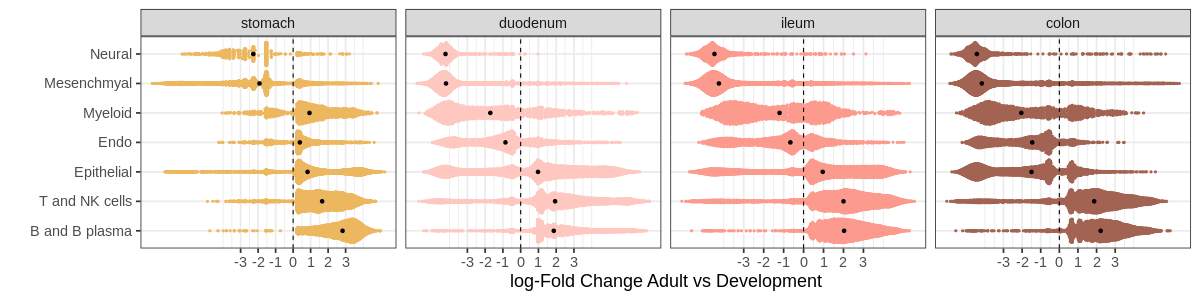

In [58]:
%%R -w 1200 -h 300 

library(ggbeeswarm)
organ_colors_df <- read.csv("~/ao15/Megagut/Annotations_v3/metadata/colors/organ_color.csv")
organ_palette <- setNames(organ_colors_df$color, organ_colors_df$organ_unified)

plot_df %>%
    filter(!is.na(anno_group)) %>%
    group_by(anno_group) %>%
    ## Fix organ naming and order 
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    ungroup()  %>%
    group_by(organ, anno_group) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=unique(anno_group))) %>%
    ggplot(aes(anno_group, logFC,  fill=organ, color=organ)) +
    geom_quasirandom(size=0.8) +
    geom_point(data= . %>% distinct(organ, anno_group, mean_logFC), aes(x=anno_group, y=mean_logFC), color="black")  +
    facet_grid(.~organ, scales="free_x") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) 
#    ggsave(paste0(figdir, "healthy_reference_milo_results_overview.png"), height=4, width=15) +
#     ggsave(paste0(figdir, "healthy_reference_milo_results_overview.pdf"), height=4, width=15)

In [59]:
%%R -w 1200 -h 300 -i figdir
library(ggbeeswarm)
organ_colors_df <- read.csv("~/ao15/Megagut/Annotations_v3/metadata/colors/organ_color.csv")
organ_palette <- setNames(organ_colors_df$color, organ_colors_df$organ_unified)

plot_df %>%
    filter(!is.na(anno_group)) %>%
    group_by(anno_group) %>%
    ## Fix organ naming and order 
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    ungroup()  %>%
    group_by(organ, anno_group) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=unique(anno_group))) %>%
    ggplot(aes(anno_group, logFC,  fill=organ, color=organ)) +
    geom_quasirandom(size=0.8) +
    geom_point(data= . %>% distinct(organ, anno_group, mean_logFC), aes(x=anno_group, y=mean_logFC), color="black")  +
    facet_grid(.~organ, scales="free_x") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) 
    ggsave(paste0(figdir, "healthy_reference_milo_results_overview.png"), height=4, width=15)

In [60]:
%%R -w 1200 -h 300 -i figdir
library(ggbeeswarm)
organ_colors_df <- read.csv("~/ao15/Megagut/Annotations_v3/metadata/colors/organ_color.csv")
organ_palette <- setNames(organ_colors_df$color, organ_colors_df$organ_unified)

plot_df %>%
    filter(!is.na(anno_group)) %>%
    group_by(anno_group) %>%
    ## Fix organ naming and order 
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    ungroup()  %>%
    group_by(organ, anno_group) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=unique(anno_group))) %>%
    ggplot(aes(anno_group, logFC,  fill=organ, color=organ)) +
    geom_quasirandom(size=0.8) +
    geom_point(data= . %>% distinct(organ, anno_group, mean_logFC), aes(x=anno_group, y=mean_logFC), color="black")  +
    facet_grid(.~organ, scales="free_x") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) 
    ggsave(paste0(figdir, "healthy_reference_milo_results_overview.pdf"), height=4, width=15)

In [61]:
%%R -w 1200 -h 1200 -i figdir -o pl_df

anno_group_order <- c("Epithelial","Mesenchymal","T and NK cells","B and B plasma","Endothelial","Myeloid","Neural")

pl_df <- plot_df %>%
    ## Reorder annotation names by median FC
    group_by(nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    mutate(nhood_anno=factor(nhood_anno, levels=unique(nhood_anno))) %>%
    ## Calculate median per organ, to plot
    group_by(organ, nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=anno_group_order)) %>%
    filter(!is.na(anno_group)) 

alpha=0.1
set.seed(12345)
pl1 <- pl_df %>%
    ## Fix organ naming and order 
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(organ_color=ifelse(SpatialFDR < alpha, as.character(organ), NA)) %>%
    ggplot(aes(nhood_anno, logFC)) +
    geom_quasirandom(size=0.5, color="grey") +
    geom_quasirandom(data=. %>% filter(SpatialFDR < alpha), size=0.7, aes(color=organ_color)) +
    geom_point(data= . %>% distinct(organ, nhood_anno, anno_group, mean_logFC), aes(x=nhood_anno, y=mean_logFC), color="black")  +
    facet_grid(anno_group~organ, scales="free", space="free_y") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) +
    theme(strip.text.y=element_text(angle=0))
    
pl1 
     ggsave(paste0(figdir, "milo_results_overview_beeswarm.pdf"), width=15, height=15)

In [62]:
%%R -w 1200 -h 1200 -i figdir -o pl_df

anno_group_order <- c("Epithelial","Mesenchymal","T and NK cells","B and B plasma","Endothelial","Myeloid","Neural")

pl_df <- plot_df %>%
    ## Reorder annotation names by median FC
    group_by(nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    mutate(nhood_anno=factor(nhood_anno, levels=unique(nhood_anno))) %>%
    ## Calculate median per organ, to plot
    group_by(organ, nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=anno_group_order)) %>%
    filter(!is.na(anno_group)) 

alpha=0.1
set.seed(12345)
pl1 <- pl_df %>%
    ## Fix organ naming and order 
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(organ_color=ifelse(SpatialFDR < alpha, as.character(organ), NA)) %>%
    ggplot(aes(nhood_anno, logFC)) +
    geom_quasirandom(size=0.5, color="grey") +
    geom_quasirandom(data=. %>% filter(SpatialFDR < alpha), size=0.7, aes(color=organ_color)) +
    geom_point(data= . %>% distinct(organ, nhood_anno, anno_group, mean_logFC), aes(x=nhood_anno, y=mean_logFC), color="black")  +
    facet_grid(anno_group~organ, scales="free", space="free_y") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) +
    theme(strip.text.y=element_text(angle=0))
    
pl1 
     ggsave(paste0(figdir, "milo_results_overview_beeswarm.png"), width=15, height=15)

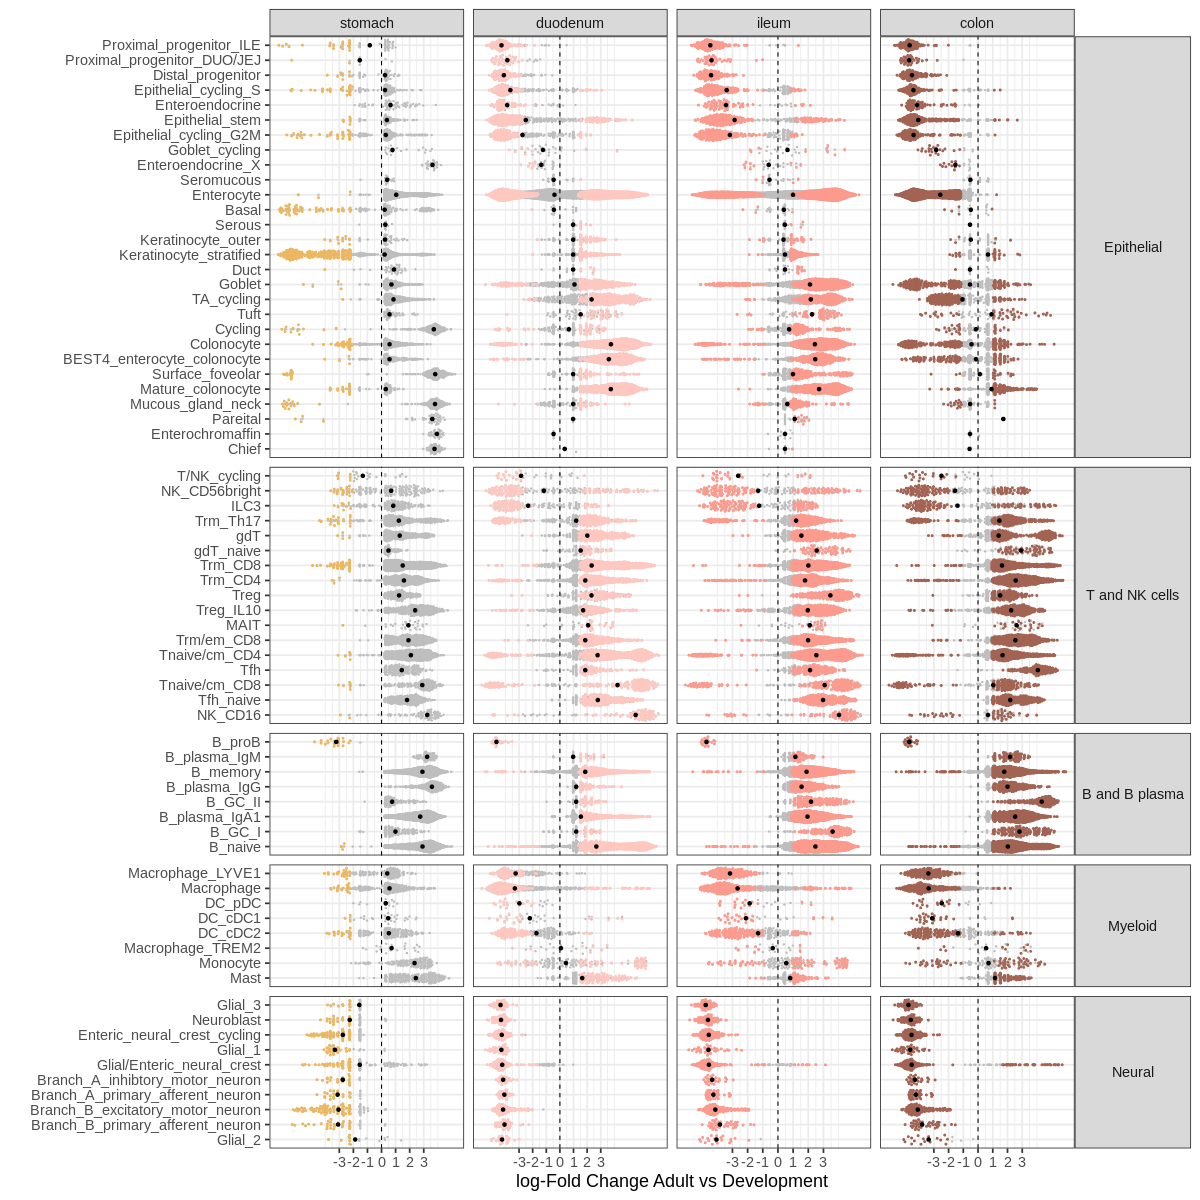

In [63]:
%%R -w 1200 -h 1200 -i figdir -o pl_df

anno_group_order <- c("Epithelial","Mesenchymal","T and NK cells","B and B plasma","Endothelial","Myeloid","Neural")

pl_df <- plot_df %>%
    ## Reorder annotation names by median FC
    group_by(nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    mutate(nhood_anno=factor(nhood_anno, levels=unique(nhood_anno))) %>%
    ## Calculate median per organ, to plot
    group_by(organ, nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=anno_group_order)) %>%
    filter(!is.na(anno_group)) 

alpha=0.1
set.seed(12345)
pl1 <- pl_df %>%
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(organ_color=ifelse(SpatialFDR < alpha, as.character(organ), NA)) %>%
    ggplot(aes(nhood_anno, logFC)) +
    geom_quasirandom(size=0.5, color="grey") +
    geom_quasirandom(data=. %>% filter(SpatialFDR < alpha), size=0.7, aes(color=organ_color)) +
    geom_point(data= . %>% distinct(organ, nhood_anno, anno_group, mean_logFC), aes(x=nhood_anno, y=mean_logFC), color="black")  +
    facet_grid(anno_group~organ, scales="free", space="free_y") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) +
    theme(strip.text.y=element_text(angle=0))
    
pl1 
#     ggsave(paste0(figdir, "milo_results_overview_beeswarm.pdf"), width=15, height=15) +
#     ggsave(paste0(figdir, "milo_results_overview_beeswarm.png"), width=15, height=15)

In [64]:
pl_df

,Nhood,nhood_anno,organ,logFC,SpatialFDR,mean_logFC,anno_group
1,3535,1,stomach,4.493661,1.530808e-01,3.763974,1
2,3602,1,stomach,4.471047,1.530808e-01,3.763974,1
3,4164,1,stomach,4.354361,1.530808e-01,3.763974,1
4,4476,1,stomach,4.297451,1.530808e-01,3.763974,1
5,4544,1,stomach,4.279143,1.530808e-01,3.763974,1
...,...,...,...,...,...,...,...
82540,31549,96,ileum,-4.998609,8.662450e-07,-4.712609,4
82541,38418,96,duodenum,-4.999288,1.025407e-02,-4.661925,4
82542,32436,96,ileum,-5.020683,8.662450e-07,-4.712609,4
82543,38418,96,colon,-5.022448,1.790812e-04,-4.660469,4


In [65]:
plot_df

,Nhood,nhood_anno,organ,logFC,SpatialFDR,mean_logFC,anno_group
1,1,Tnaive/cm_CD4,duodenum,7.262853,2.022091e-06,7.262853,T and NK cells
2,2,NK_CD16,duodenum,7.223134,1.924843e-06,7.223134,T and NK cells
3,3,NK_CD56bright,duodenum,7.182290,1.893940e-06,7.182290,T and NK cells
4,4,Tnaive/cm_CD8,duodenum,7.182290,1.893940e-06,7.182290,T and NK cells
5,5,Tnaive/cm_CD4,duodenum,7.125968,1.844707e-06,7.125968,T and NK cells
...,...,...,...,...,...,...,...
128922,39128,Mesoderm_1,stomach,-7.793359,3.500357e-07,-7.793359,Mesenchmyal
128923,27230,Mesoderm_1,stomach,-7.913134,2.652901e-07,-7.913134,Mesenchmyal
128924,27134,Mesoderm_1,stomach,-7.958392,2.194622e-07,-7.958392,Mesenchmyal
128925,31235,Mesoderm_1,stomach,-7.969488,2.194622e-07,-7.969488,Mesenchmyal


In [66]:
plot_df2 = plot_df[plot_df.anno_group.isin(['T and NK cells','B and B plasma','Myeloid'])].copy()

In [67]:
plot_df2

,Nhood,nhood_anno,organ,logFC,SpatialFDR,mean_logFC,anno_group
1,1,Tnaive/cm_CD4,duodenum,7.262853,0.000002,7.262853,T and NK cells
2,2,NK_CD16,duodenum,7.223134,0.000002,7.223134,T and NK cells
3,3,NK_CD56bright,duodenum,7.182290,0.000002,7.182290,T and NK cells
4,4,Tnaive/cm_CD8,duodenum,7.182290,0.000002,7.182290,T and NK cells
5,5,Tnaive/cm_CD4,duodenum,7.125968,0.000002,7.125968,T and NK cells
...,...,...,...,...,...,...,...
128144,39138,Tnaive/cm_CD8,colon,-5.852481,0.000185,-5.852481,T and NK cells
128150,39134,Tnaive/cm_CD4,ileum,-5.869414,0.000002,-5.869414,T and NK cells
128172,39138,Tnaive/cm_CD8,ileum,-5.906331,0.000002,-5.906331,T and NK cells
128231,30302,Tnaive/cm_CD8,colon,-6.046442,0.000199,-6.046442,T and NK cells


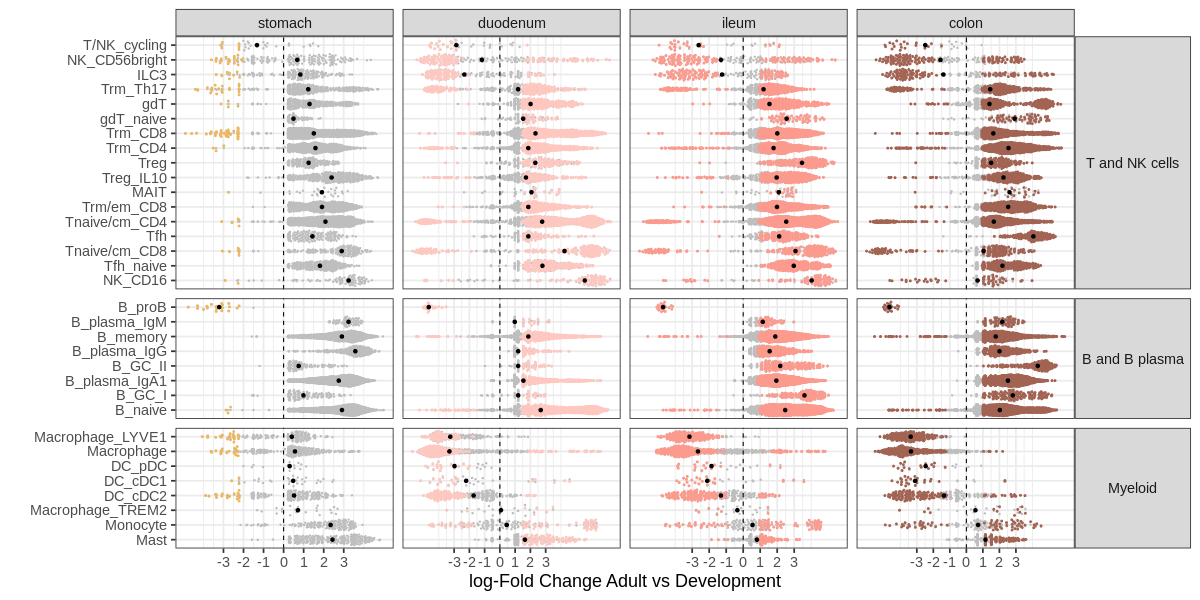

In [68]:
%%R -w 1200 -h 600 -i figdir -i plot_df2 -o pl_df

anno_group_order <- c("Epithelial","Mesenchymal","T and NK cells","B and B plasma","Endothelial","Myeloid","Neural")

pl_df <- plot_df2 %>%
    ## Reorder annotation names by median FC
    group_by(nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    mutate(nhood_anno=factor(nhood_anno, levels=unique(nhood_anno))) %>%
    ## Calculate median per organ, to plot
    group_by(organ, nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=anno_group_order)) %>%
    filter(!is.na(anno_group)) 

alpha=0.1
set.seed(12345)
pl1 <- pl_df %>%
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(organ_color=ifelse(SpatialFDR < alpha, as.character(organ), NA)) %>%
    ggplot(aes(nhood_anno, logFC)) +
    geom_quasirandom(size=0.5, color="grey") +
    geom_quasirandom(data=. %>% filter(SpatialFDR < alpha), size=0.7, aes(color=organ_color)) +
    geom_point(data= . %>% distinct(organ, nhood_anno, anno_group, mean_logFC), aes(x=nhood_anno, y=mean_logFC), color="black")  +
    facet_grid(anno_group~organ, scales="free", space="free_y") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) +
    theme(strip.text.y=element_text(angle=0))
    
pl1 
#     ggsave(paste0(figdir, "milo_results_overview_beeswarm.pdf"), width=15, height=15) +
#     ggsave(paste0(figdir, "milo_results_overview_beeswarm.png"), width=15, height=15)

In [69]:
%%R -w 1200 -h 600 -i figdir -i plot_df2 -o pl_df

anno_group_order <- c("Epithelial","Mesenchymal","T and NK cells","B and B plasma","Endothelial","Myeloid","Neural")

pl_df <- plot_df2 %>%
    ## Reorder annotation names by median FC
    group_by(nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    mutate(nhood_anno=factor(nhood_anno, levels=unique(nhood_anno))) %>%
    ## Calculate median per organ, to plot
    group_by(organ, nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=anno_group_order)) %>%
    filter(!is.na(anno_group)) 

alpha=0.1
set.seed(12345)
pl1 <- pl_df %>%
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(organ_color=ifelse(SpatialFDR < alpha, as.character(organ), NA)) %>%
    ggplot(aes(nhood_anno, logFC)) +
    geom_quasirandom(size=0.5, color="grey") +
    geom_quasirandom(data=. %>% filter(SpatialFDR < alpha), size=0.7, aes(color=organ_color)) +
    geom_point(data= . %>% distinct(organ, nhood_anno, anno_group, mean_logFC), aes(x=nhood_anno, y=mean_logFC), color="black")  +
    facet_grid(anno_group~organ, scales="free", space="free_y") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) +
    theme(strip.text.y=element_text(angle=0))
    
pl1 
    ggsave(paste0(figdir, "milo_results_overview_immune_beeswarm.pdf"), width=15, height=15)
#     ggsave(paste0(figdir, "milo_results_overview_immune_beeswarm.png"), width=15, height=15)

In [70]:
%%R -w 1200 -h 600 -i figdir -i plot_df2 -o pl_df

anno_group_order <- c("Epithelial","Mesenchymal","T and NK cells","B and B plasma","Endothelial","Myeloid","Neural")

pl_df <- plot_df2 %>%
    ## Reorder annotation names by median FC
    group_by(nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    arrange(- mean_logFC) %>%
    mutate(nhood_anno=factor(nhood_anno, levels=unique(nhood_anno))) %>%
    ## Calculate median per organ, to plot
    group_by(organ, nhood_anno) %>%
    mutate(mean_logFC = median(logFC)) %>%
    ungroup() %>%
    mutate(anno_group=factor(anno_group, levels=anno_group_order)) %>%
    filter(!is.na(anno_group)) 

alpha=0.1
set.seed(12345)
pl1 <- pl_df %>%
    mutate(organ=factor(organ, levels=c("stomach",'duodenum','ileum','colon'))) %>%
    mutate(organ_color=ifelse(SpatialFDR < alpha, as.character(organ), NA)) %>%
    ggplot(aes(nhood_anno, logFC)) +
    geom_quasirandom(size=0.5, color="grey") +
    geom_quasirandom(data=. %>% filter(SpatialFDR < alpha), size=0.7, aes(color=organ_color)) +
    geom_point(data= . %>% distinct(organ, nhood_anno, anno_group, mean_logFC), aes(x=nhood_anno, y=mean_logFC), color="black")  +
    facet_grid(anno_group~organ, scales="free", space="free_y") +
    coord_flip() +
    scale_color_manual(values=organ_palette) +
    scale_fill_manual(values=organ_palette) +
    guides(color="none", fill="none") +
    geom_hline(yintercept=0, linetype=2) +
    theme_bw(base_size=18) +
    xlab("") + ylab("log-Fold Change Adult vs Development") +
    scale_y_continuous(breaks=seq(-3,3, by=1)) +
    theme(strip.text.y=element_text(angle=0))
    
pl1 
#    ggsave(paste0(figdir, "milo_results_overview_immune_beeswarm.pdf"), width=15, height=15)
     ggsave(paste0(figdir, "milo_results_overview_immune_beeswarm.png"), width=15, height=15)